## Profiles global averages:

In [1]:
from sect_sens.util.plot import plot_profiles

from sect_sens.util.naming_conventions import var_info

from sect_sens.util.imports import get_averaged_fields

from IPython import get_ipython
from useful_scit.imps import (plt)
from matplotlib.lines import Line2D
import seaborn as sns

from sect_sens.data_info.simulation_types import get_diff_by_type, get_casen_by_type_mod
from sect_sens.util.imports import get_averaged_fields
from sect_sens.util.naming_conventions.var_info import get_fancy_var_name, get_fancy_unit_xr
from sect_sens.util.plot.colors import get_case_col
from sect_sens.util.plot.plot_maps import plot_map_diff, plot_map

from sect_sens.constants import get_plotpath, path_data_info
from sect_sens.util.practical_functions import make_folders
import cartopy.crs as ccrs
from matplotlib import gridspec
from matplotlib import colors

from IPython.display import clear_output

# noinspection PyBroadException
try:
    _ipython = get_ipython()
    _magic = _ipython.magic
    _magic('load_ext autoreload')
    _magic('autoreload 2')
except:
    pass

/home/ubuntu/mnts/nird/projects/SECT_SENS/sect_sens/data_info/area_defs.csv
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Div settings:

In [2]:
p_level = 1013.
pmin = 850.  # minimum pressure level
avg_over_lev = True  # True#True#False#True
pressure_adjust = True  # Can only be false if avg_over_lev false. Plots particular hybrid sigma lev
p_levels = [1013., 900., 800., 700., 600.]  # used if not avg

In [3]:
model = 'NorESM'

startyear = '0004-01'
endyear = '0008-12'

In [4]:
import pandas as pd
from pathlib import Path
case_types = ['PI', 'PD']
mod_types = ['OsloAeroSec',   'OsloAero$_{imp}$', 'OsloAero$_{def}$'][::-1]

### Cases

In [5]:
cases_sec = [
    'NF1850_SECT_ctrl',
    #'NF1850_SECT_gord',
    'NF1850_aeroxid2014_SECT_ctrl',
    #'NF1850_aeroxid2014_SECT_gord'
]
cases_orig = [
    'NF1850_noSECT_def',
    'NF1850_aeroxid2014_noSECT_def',
    'NF1850_aeroxid2014_noSECT_ox_ricc',
    'NF1850_noSECT_ox_ricc',
    #'NF1850_noSECT_ox_gord',
    #'NF1850_aeroxid2014_noSECT_ox_ricc_test_gordon',
]

cases = cases_orig + cases_sec

## Filenames

In [6]:
version = 'pi_pd_prof_PIPD_sep_clean'
plot_path = get_plotpath('prof')
filen_base = plot_path + '/%s' % version
# print(plot_path)
make_folders(plot_path)

### Variables to load

In [7]:
varl = ['NCONC01', 'N_AER', 'AWNC_incld', 'AREL_incld','SOA_NA','SO4_NA','N50','N100','N150','N200','N250']#, 'CDNUMC',
        #'SWCF_Ghan', 'LWCF_Ghan', 'NCFT_Ghan']
subfig_size = 2.9
asp_ratio = .9
print(varl)

['NCONC01', 'N_AER', 'AWNC_incld', 'AREL_incld', 'SOA_NA', 'SO4_NA', 'N50', 'N100', 'N150', 'N200', 'N250']


In [14]:
import pandas as pd
from pathlib import Path
case_types = ['PI', 'PD']
mod_types = ['OsloAeroSec',   'OsloAero$_{imp}$', 'OsloAero$_{def}$'][::-1]#'OsloAeroSec$_{gord}$','OsloAero$_{gord}$'
cdic = {key: get_case_col(key) for key in mod_types}  # , ['r','g','b'])}

## Load data:

In [8]:
from useful_scit.imps import *

area='Global'
log.ger.setLevel(log.log.DEBUG)

prof_dic = get_averaged_fields.get_profiles(cases, varl, startyear, endyear, area=area,
                                            pressure_adjust=pressure_adjust)

Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/NCONC01_0004-01-0008-12.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/N_AER_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/AWNC_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/AREL_incld_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/SOA_NA_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/SO4_NA_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSECT_def/Global/N50_0004-01-0008-12.nc
Loading file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//means/profile_means//NorESM/NF1850_noSE

### Plot function: 

In [9]:
def plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title=''):
    #var='NCONC01'
    #xscale='log'
    #yscale='log'
    #ylim=[1e3, 100]
    #pressure_coords=True
    #title=''
    if ylim is None:
        ylim = [1e3, 100]
    if ax is None:
        fig, ax = plt.subplots(1, figsize=[3.5,3.5])
    hndls=[]
    for mty in mod_types:
        case_PI= get_casen_by_type_mod('PI',mty)
        case_PIPDaer= get_casen_by_type_mod('PD',mty)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]
        h = plt.fill_betweenx(daPI.lev,daPI, daPIPD, color = cdic[mty],
                        label=mty,
                          alpha=.4
                              )
        hndls.append(h)
    for mty in mod_types:
        case_PI= get_casen_by_type_mod('PI',mty)
        case_PIPDaer= get_casen_by_type_mod('PD',mty)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]

        daPI.plot(  y='lev',ax=ax, color=cdic[mty])
        daPIPD.plot(y='lev',ax=ax, linestyle='dashed',color=cdic[mty],)

    ax.set_ylim(ylim)
    if len(title) > 0:
        ax.set_title(title)
    if pressure_coords:
        ax.set_ylabel('Pressure [hPa]')
    xlabel = get_fancy_var_name(var) + ' [%s]' % var_info.get_fancy_unit_xr(daPI,
                                                                                                              var)
    ax.set_xlabel(xlabel)
    ax.set_yscale(yscale)
    ax.set_xscale(xscale)
    first_leg= plt.legend(handles=hndls, loc=1, frameon=False)
    ax_l = plt.gca().add_artist(first_leg)
    custom_lines = [Line2D([0], [0], color='k'),
                    Line2D([0], [0], color='k', linestyle='dashed'),]
    plt.legend(custom_lines, ['PI', 'PD'], loc='center right', frameon=False)
    sns.despine(ax.get_figure(), ax)
    plot_profiles.set_scalar_formatter(ax)
    
    
    
    return ax

In [10]:

from sect_sens.util.slice_average.avg_pkg import yearly_mean_dic
from sect_sens.util.slice_average.significance import hatch_area_sign

## Get yearly means:

In [11]:
dic_means_yr = yearly_mean_dic(['NCONC01','AWNC_incld'], cases, startyear, endyear, pmin, pressure_adjust,
                                   avg_over_lev=avg_over_lev, groupby='time.year', dims=('lat','lon'), area='Global')

2021-10-07 11:55:25,920 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:25,920 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:25,923 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:25,923 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:26,342 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/LANDFRAC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/NCONC01_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc]


2021-10-07 11:55:26,342 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/LANDFRAC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/NCONC01_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc]
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:26,964 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:26,964 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:26,966 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:26,966 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:27,332 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/LANDFRAC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/FREQL_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/AWNC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc]


2021-10-07 11:55:27,332 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/LANDFRAC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/FREQL_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_def/AWNC_NorESM_NF1850_noSECT_def_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc
averaging case NF1850_noSECT_def:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:28,083 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:28,083 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:28,084 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:28,084 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:28,453 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/NCONC01_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc]


2021-10-07 11:55:28,453 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/NCONC01_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:28,989 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:28,989 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:28,991 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:28,991 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:29,337 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/FREQL_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/AWNC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc]


2021-10-07 11:55:29,337 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/FREQL_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_def/AWNC_NorESM_NF1850_aeroxid2014_noSECT_def_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc
averaging case NF1850_aeroxid2014_noSECT_def:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_def/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:30,080 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:30,080 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:30,082 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:30,082 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:30,450 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/NCONC01_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc]


2021-10-07 11:55:30,450 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/NCONC01_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:31,048 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:31,048 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:31,050 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:31,050 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:31,397 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/FREQL_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/AWNC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc]


2021-10-07 11:55:31,397 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/FREQL_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/AWNC_NorESM_NF1850_aeroxid2014_noSECT_ox_ricc_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc
averaging case NF1850_aeroxid2014_noSECT_ox_ricc:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:32,165 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:32,165 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:32,167 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:32,167 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:32,540 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/NCONC01_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc]


2021-10-07 11:55:32,540 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/NCONC01_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:33,098 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:33,098 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:33,100 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:33,100 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:33,444 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/FREQL_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/AWNC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc]


2021-10-07 11:55:33,444 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/LANDFRAC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/FREQL_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_noSECT_ox_ricc/AWNC_NorESM_NF1850_noSECT_ox_ricc_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc
averaging case NF1850_noSECT_ox_ricc:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_noSECT_ox_ricc/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:34,202 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:34,202 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:34,203 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:34,203 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:34,574 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/LANDFRAC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/NCONC01_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc]


2021-10-07 11:55:34,574 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/LANDFRAC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/NCONC01_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:35,122 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:35,122 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:35,124 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:35,124 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:35,495 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/LANDFRAC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/FREQL_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/AWNC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc]


2021-10-07 11:55:35,495 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/LANDFRAC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/FREQL_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_SECT_ctrl/AWNC_NorESM_NF1850_SECT_ctrl_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc
averaging case NF1850_SECT_ctrl:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:36,253 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:36,253 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:36,255 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:36,255 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'P0', 'hybm', 'LOGR', 'hybi', 'NCONC01', 'hyai', 'slon', 'hyam', 'PS', 'ilev']


2021-10-07 11:55:36,627 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/LANDFRAC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/NCONC01_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc]


2021-10-07 11:55:36,627 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/LANDFRAC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/NCONC01_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['NCONC01']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
2021-10-07 11:55:37,208 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:37,208 useful_scit  DEBUG    Getting fields fixed input fields:


2021-10-07 11:55:37,209 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:37,209 useful_scit  DEBUG    checking for pressure coord fields for ['LANDFRAC', 'area', 'slat', 'gw', 'hyam', 'P0', 'hybm', 'LOGR', 'hybi', 'hyai', 'FREQL', 'slon', 'AWNC', 'PS', 'ilev']


2021-10-07 11:55:37,552 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/LANDFRAC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/FREQL_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/AWNC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc]


2021-10-07 11:55:37,552 useful_scit  DEBUG    Opening pressure coord files: [/home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/LANDFRAC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/FREQL_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc, /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//Fields_pressure_coordinates/NorESM/NF1850_aeroxid2014_SECT_ctrl/AWNC_NorESM_NF1850_aeroxid2014_SECT_ctrl_0004-01-0008-12.nc]


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/numpy/core/_asarray.py:85: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  return array(a, dtype, copy=False, order=order)


found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc
averaging case NF1850_aeroxid2014_SECT_ctrl:
['AWNC', 'FREQL']
found contants file /home/ubuntu/mnts/nird/projects//Output_data_SECT_SENS//computed_fields_ng/NorESM/NF1850_aeroxid2014_SECT_ctrl/constants.nc


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/xarray/coding/times.py:426: SerializationWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using cftime.datetime objects instead, reason: dates out of range
  dtype = _decode_cf_datetime_dtype(data, units, calendar, self.use_cftime)


## Plot function: 

In [12]:
    
def plt_yearly_mean_PIPD(var, 
                         pressure_coords=True, 
                         title='',
                         yscale='log',
                         xscale='linear',
                         ylim = [1e3, 100],
                        ):
    fig, axs = plt.subplots(1,2, figsize=[6,3.5,], sharey=True, dpi=150)
    hndls =[]
    for mty in mod_types:
        case_PI= get_casen_by_type_mod('PI',mty)
        case_PIPDaer= get_casen_by_type_mod('PD',mty)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]
        for y in dic_means_yr[case_PI]['year']:
            h =dic_means_yr[case_PI][var].sel(year=y).plot(y='lev',ax=axs[0], color=cdic[mty], linewidth=0.5, 
                                                           label=mty)
            h = dic_means_yr[case_PIPDaer][var].sel(year=y).plot(y='lev',ax=axs[1], color=cdic[mty], linewidth=0.5, 
                                                           label=mty)
        hndls.append(h)
 
        #hndls.append(h)
    for mty in mod_types:
        case_PI= get_casen_by_type_mod('PI',mty)
        case_PIPDaer= get_casen_by_type_mod('PD',mty)
        daPI = prof_dic[case_PI][var]
        daPIPD = prof_dic[case_PIPDaer][var]

    for ax in axs:
        ax.set_ylim(ylim)
        if pressure_coords:
            ax.set_ylabel('Pressure [hPa]')
        xlabel = get_fancy_var_name(var) + ' [%s]' % var_info.get_fancy_unit_xr(daPI,
                                                                                                              var)
        ax.set_xlabel(xlabel)
        #ax.grid(True, which='both')
        ax.set_yscale(yscale)
        ax.set_xscale(xscale)
    ax = axs[0]
    axs[1].legend()#handles=hndls, labels=mod_types, loc=1, frameon=False)
    custom_lines = [Line2D([0], [0], color=cdic[mty]) for mty in mod_types]
    plt.legend(custom_lines, mod_types, loc='center right', frameon=False)
    sns.despine(ax.get_figure(), ax)
    plot_profiles.set_scalar_formatter(ax)
    axs[0].set_title('Pre-industrial')
    axs[1].set_title('Present day')

## Plots:

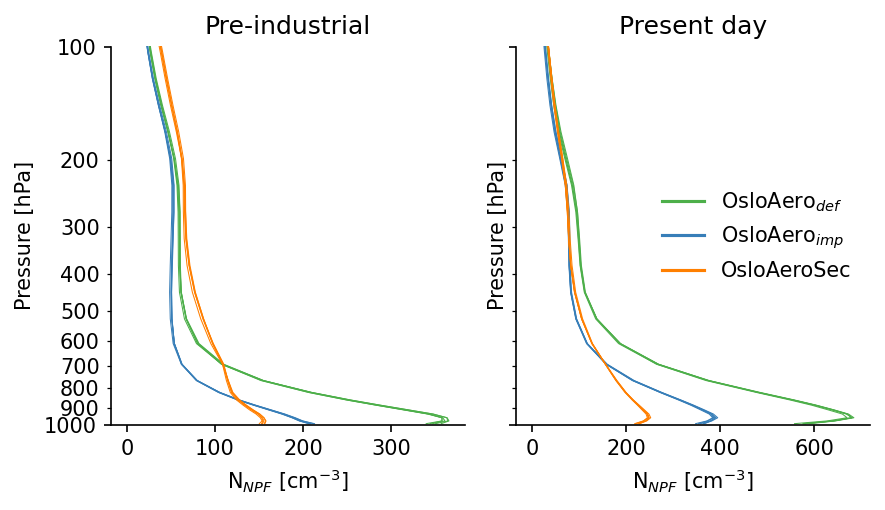

In [15]:
var='NCONC01'
plt_yearly_mean_PIPD(var)


fin = f'{filen_base}_{var}'
plt.tight_layout()
clear_output()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

In [16]:
print(fin)

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//prof//pi_pd_prof_PIPD_sep_clean_NCONC01


/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in true_divide
  return func(*(_execute_task(a, cache) for a in args))
/persistent01/miniconda3/envs/env_sec_v2/lib/python3.6/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/persistent01/miniconda3/envs/env_sec_v2/l

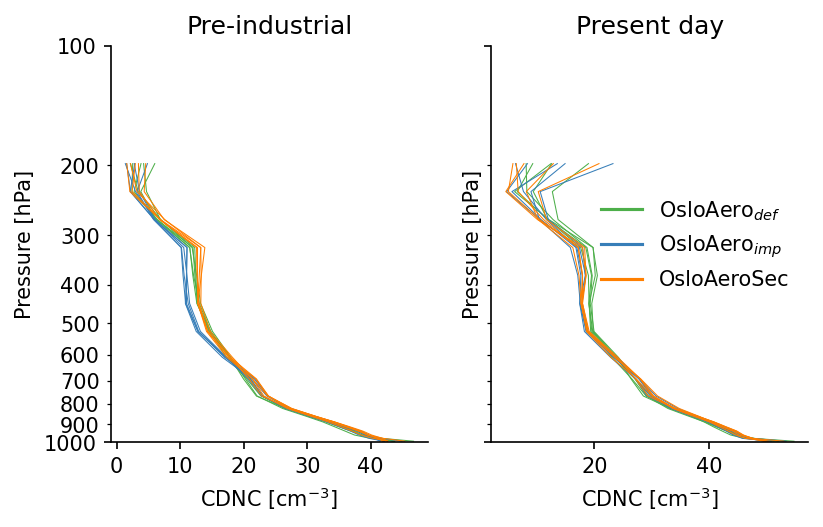

In [17]:
plt_yearly_mean_PIPD('AWNC_incld')

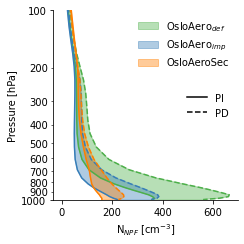

/home/ubuntu/mnts/nird/projects//Plots_SECT_SENS//prof//pi_pd_prof_PIPD_sep_clean_NCONC01


In [32]:
var = 'NCONC01'

ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')



fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()
print(fin)

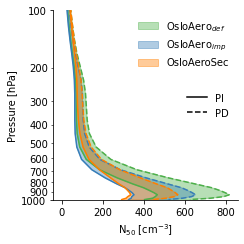

In [19]:
var = 'N50'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

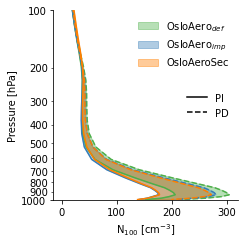

In [20]:
var = 'N100'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

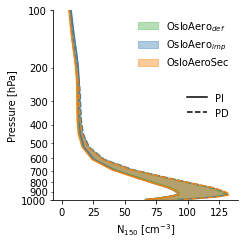

In [21]:
var = 'N150'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

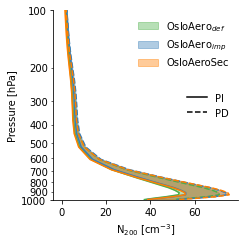

In [22]:
var = 'N200'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

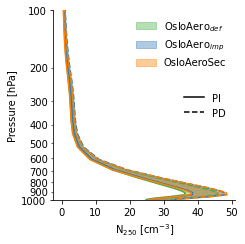

In [23]:
var = 'N250'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

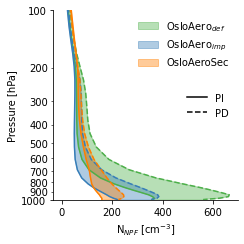

In [24]:
var = 'NCONC01'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

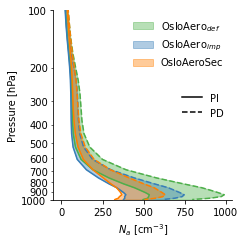

In [25]:
var = 'N_AER'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

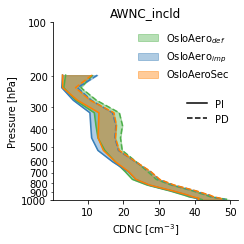

In [26]:
var = 'AWNC_incld'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title=var)
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

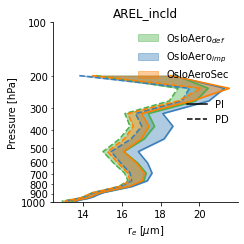

In [27]:
var = 'AREL_incld'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title=var)
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

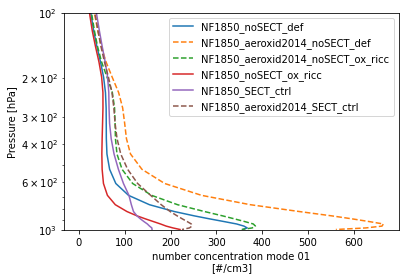

In [28]:


for case in cases:
    if 'aeroxid2014' in case:
        prof_dic[case]['NCONC01'].plot(y='lev', yscale='log',ylim=[1e3,100],
                                     linestyle='dashed',
                                       label=case)
    else:
        prof_dic[case]['NCONC01'].plot(y='lev', yscale='log',ylim=[1e3,100],
                                       label=case
                                       )#,linestyle='dashed')

plt.legend()
plt.show()

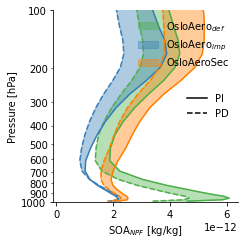

In [29]:
var = 'SOA_NA'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()

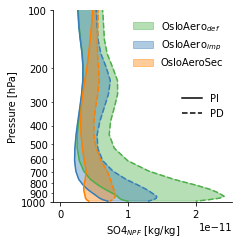

In [30]:
var = 'SO4_NA'
ax = plt_pipd_diff_prof(var, prof_dic, ax=None, xscale='linear', yscale='log', ylim=None, pressure_coords=True,
                        title='')
fin = f'{filen_base}_{var}'
plt.tight_layout()
plt.savefig(fin+'.pdf', dpi=300)
plt.show()